## Classification de présidents 

In [1329]:
import codecs
import nltk
import re
import os.path
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import NearMiss
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer

import codecs
import re
import os.path
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import imblearn
import spacy
from nltk.stem.snowball import FrenchStemmer

from collections import OrderedDict
import nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import tokenize
import itertools
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from sklearn import linear_model as lin
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
import process2 as pr
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [1331]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs


In [1332]:
#fname = "/Users/vguigue/Documents/Cours/TAL/tp/tme2/ressources/AFDpresidentutf8/corpus.tache1.learn.utf8"
fname = "/home/tina/Desktop/M1/s2/rital/tme1/corpus.tache1.learn.utf8"
alltxts,alllabs = load_pres(fname)
fname2 = "/home/tina/Desktop/M1/s2/rital/tme1/corpus.tache1.test.utf8"
alltxts_t,alllabs_t = load_pres(fname2)

In [1333]:
print(len(alltxts),len(alllabs))
print(alltxts[0])
print(alllabs[0])
print(alltxts[-1])
print(alllabs[-1])
print(alllabs[11])

57413 57413
 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

1
 Je compte sur vous.

1
-1


## Chaine de Preprocessing paramétrique

### Chaine 1 (enlever stops words + stemming + tfidf+ mots trés fréqeunts ) 

In [1334]:
tran1=pr.tranform(alltxts)

In [1335]:
corpus1=tran1.text_trans()

In [1336]:
X1=tran1.vect_tfidf(corpus1)

In [1337]:
#mat1=tran1.tfidf_most_less_words(np.array(X1))

### Chaine 2 (garder stops words + stemming + sans TFidf) 

In [1338]:
tran2=pr.tranform(alltxts)
corpus2=tran2.text_trans(2)
X2=(tran2.vect(corpus2))

### Chaine 3 (enlever stops words + sans stemming) 

In [1339]:
tran3=pr.tranform(alltxts)
corpus3=tran3.text_trans(3)
X3=(tran3.vect(corpus3))

### Chaine 4 (découpage en mots + enlevers les mots trés fréquents ) 

In [1340]:
tran4=pr.tranform(alltxts)
corpus4=tran4.text_trans(4)
X4=(tran4.vect(corpus4))

### Chaine 5 ( Unigramme-Bigramme + tfidf) 

In [1342]:
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=0.01,max_df=0.95)
X5 = vectorizer.fit_transform(alltxts)

### Chaine 6 ( not Lowercase + keepstopwords )

In [1343]:
vectorizer = CountVectorizer(lowercase=False)
X6= vectorizer.fit_transform(alltxts)

### Chaine 7( aucun traitement juste découpage en mots)

In [1344]:
vectorizer = CountVectorizer()
X7 = vectorizer.fit_transform(alltxts)

In [1345]:
matrixes=[X1,X2,X3,X4,X5,X6,X7]

## Selection du meilleur modele

In [1348]:
#oversample = RandomOverSampler(sampling_strategy='minority')


0.9.0


In [1354]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

##  Équilibrage des données 
#### Avec UnderSampling et OverSampling

In [172]:
print('Resampled dataset shape %s' % Counter(alllabs))

nm = NearMiss()
print(Counter(alllabs))
X_eq1, y_eq1 = nm.fit_resample(mat1, alllabs )
#X_eq3, y_eq3 = nm.fit_resample(X3, alllabs )
#X_eq4, y_eq4 = nm.fit_resample(X4, alllabs )

print('Resampled dataset shape %s' % Counter(y_eq1))

Resampled dataset shape Counter({1: 49890, -1: 7523})
Counter({1: 49890, -1: 7523})
Resampled dataset shape Counter({-1: 7523, 1: 7523})


In [1358]:
nm = NearMiss()
X_eq2, y_eq2 = nm.fit_resample(X2, alllabs)
X_eq22, y_eq22 = oversample.fit_resample(X2, alllabs)

In [1359]:
nm = NearMiss()
X_eq3, y_eq3 = nm.fit_resample(X3, alllabs)
X_eq33, y_eq33 = oversample.fit_resample(X3, alllabs)

In [1360]:
nm = NearMiss()
X_eq4, y_eq4 = nm.fit_resample(X4, alllabs)
X_eq44, y_eq44 = oversample.fit_resample(X4, alllabs)

In [1361]:
from collections import Counter 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


def testmodels(Xtrain, Xtest, Ytrain, Ytest):
    wieghts=Counter(Ytrain)
    prior=np.array(list(wieghts.values()))/len(Ytrain)
    print(prior)
    Nclasses=len(np.unique(Ytrain))
    for  v in wieghts.values():
        v= len(Ytrain) /(Nclasses*v) 
        
    models={"log regression":lin.LogisticRegression(max_iter=1500),
           "svm SVC": svm.LinearSVC(max_iter=10000),
            "multinomial Bais" :MultinomialNB(class_prior=prior)
            }
              
    for model in models.keys() :
        
        clf = models[model]
        
        if model == 'svm SVC':
            grid = {'C': [0.01,0.09,0.1,0.2,0.5,1,2,3]}
        elif model == 'log regression':
            grid = {'C':[0.1,0.5,1,2] ,'penalty': ['l1', 'l2', None]}
            
        cv = KFold(shuffle = True, random_state = 0)
        
        if (model != "multinomial Bais" ) :
            clf = GridSearchCV(clf, grid, cv = cv, n_jobs = -1, scoring = 'f1')
            clf.fit(Xtrain, Ytrain)
            print ("\n_____________" + model + " n_____________\n ",classification_report(Ytest, clf.predict(Xtest)),"\n parametres : \n", clf.best_params_ ) 


        
        else:
            clf.fit(Xtrain, Ytrain)
            print ("\n_____________" + model + " n_____________\n ",classification_report(Ytest, clf.predict(Xtest)),"\n parametres : \n") 



In [1362]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_eq1,y_eq1, test_size=0.3,random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_eq2,y_eq2, test_size=0.3,random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_eq3,y_eq3, test_size=0.4,random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_eq4,y_eq4, test_size=0.4,random_state=0)


In [1363]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(X_eq1,y_eq1, test_size=0.3,random_state=0)
X_train22, X_test22, y_train22, y_test22 = train_test_split(X_eq2,y_eq2, test_size=0.4,random_state=0)
X_train33, X_test33, y_train33, y_test33 = train_test_split(X_eq3,y_eq3, test_size=0.3,random_state=0)
X_train44, X_test44, y_train44, y_test44 = train_test_split(X_eq4,y_eq4, test_size=0.4,random_state=0)

In [1364]:
testmodels(X_train1, X_test1, y_train1, y_test1)

[0.49572731 0.50427269]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.74      0.73      0.74      2212
           1       0.75      0.75      0.75      2302

    accuracy                           0.74      4514
   macro avg       0.74      0.74      0.74      4514
weighted avg       0.74      0.74      0.74      4514
 
 parametres : 
 {'C': 2, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.74      0.72      0.73      2212
           1       0.74      0.75      0.75      2302

    accuracy                           0.74      4514
   macro avg       0.74      0.74      0.74      4514
weighted avg       0.74      0.74      0.74      4514
 
 parametres : 
 {'C': 0.5}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.70      0.79      0.75      2212
         

In [1365]:
testmodels(X_train11, X_test11, y_train11, y_test11)

[0.49572731 0.50427269]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.74      0.73      0.74      2212
           1       0.75      0.75      0.75      2302

    accuracy                           0.74      4514
   macro avg       0.74      0.74      0.74      4514
weighted avg       0.74      0.74      0.74      4514
 
 parametres : 
 {'C': 2, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.74      0.72      0.73      2212
           1       0.74      0.75      0.75      2302

    accuracy                           0.74      4514
   macro avg       0.74      0.74      0.74      4514
weighted avg       0.74      0.74      0.74      4514
 
 parametres : 
 {'C': 0.5}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.70      0.79      0.75      2212
         

In [1366]:
testmodels(X_train2, X_test2, y_train2, y_test2)

[0.49572731 0.50427269]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.93      0.83      0.88      2212
           1       0.85      0.94      0.89      2302

    accuracy                           0.89      4514
   macro avg       0.89      0.88      0.88      4514
weighted avg       0.89      0.89      0.89      4514
 
 parametres : 
 {'C': 0.5, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.93      0.83      0.88      2212
           1       0.85      0.94      0.89      2302

    accuracy                           0.89      4514
   macro avg       0.89      0.88      0.89      4514
weighted avg       0.89      0.89      0.89      4514
 
 parametres : 
 {'C': 0.09}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.68      0.94      0.79      2212
      

In [1367]:
testmodels(X_train22, X_test22, y_train22, y_test22)

[0.50459732 0.49540268]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.92      0.83      0.88      2968
           1       0.85      0.93      0.89      3051

    accuracy                           0.88      6019
   macro avg       0.89      0.88      0.88      6019
weighted avg       0.89      0.88      0.88      6019
 
 parametres : 
 {'C': 0.5, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.93      0.83      0.88      2968
           1       0.85      0.94      0.89      3051

    accuracy                           0.88      6019
   macro avg       0.89      0.88      0.88      6019
weighted avg       0.89      0.88      0.88      6019
 
 parametres : 
 {'C': 0.09}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.66      0.94      0.78      2968
      

In [1368]:
testmodels(X_train3, X_test3, y_train3, y_test3)

[0.50459732 0.49540268]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.91      0.77      0.84      2968
           1       0.81      0.93      0.86      3051

    accuracy                           0.85      6019
   macro avg       0.86      0.85      0.85      6019
weighted avg       0.86      0.85      0.85      6019
 
 parametres : 
 {'C': 2, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.93      0.75      0.83      2968
           1       0.80      0.94      0.86      3051

    accuracy                           0.85      6019
   macro avg       0.86      0.85      0.85      6019
weighted avg       0.86      0.85      0.85      6019
 
 parametres : 
 {'C': 0.1}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.62      0.94      0.75      2968
         

In [1370]:
testmodels(X_train33, X_test33, y_train33, y_test33)

[0.49572731 0.50427269]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.92      0.77      0.84      2212
           1       0.81      0.94      0.87      2302

    accuracy                           0.86      4514
   macro avg       0.87      0.86      0.86      4514
weighted avg       0.87      0.86      0.86      4514
 
 parametres : 
 {'C': 1, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.93      0.76      0.84      2212
           1       0.81      0.94      0.87      2302

    accuracy                           0.86      4514
   macro avg       0.87      0.85      0.85      4514
weighted avg       0.87      0.86      0.85      4514
 
 parametres : 
 {'C': 0.1}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.64      0.93      0.76      2212
         

In [1371]:
testmodels(X_train4, X_test4, y_train4, y_test4)

[0.50459732 0.49540268]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.94      0.82      0.88      2968
           1       0.84      0.95      0.89      3051

    accuracy                           0.89      6019
   macro avg       0.89      0.88      0.88      6019
weighted avg       0.89      0.89      0.88      6019
 
 parametres : 
 {'C': 0.5, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.95      0.81      0.87      2968
           1       0.84      0.95      0.89      3051

    accuracy                           0.89      6019
   macro avg       0.89      0.88      0.88      6019
weighted avg       0.89      0.89      0.88      6019
 
 parametres : 
 {'C': 0.09}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.63      0.96      0.76      2968
      

In [1372]:
testmodels(X_train44, X_test44, y_train44, y_test44)

[0.50459732 0.49540268]

_____________log regression n_____________
                precision    recall  f1-score   support

          -1       0.94      0.82      0.88      2968
           1       0.84      0.95      0.89      3051

    accuracy                           0.89      6019
   macro avg       0.89      0.88      0.88      6019
weighted avg       0.89      0.89      0.88      6019
 
 parametres : 
 {'C': 0.5, 'penalty': 'l2'}

_____________svm SVC n_____________
                precision    recall  f1-score   support

          -1       0.95      0.81      0.87      2968
           1       0.84      0.95      0.89      3051

    accuracy                           0.89      6019
   macro avg       0.89      0.88      0.88      6019
weighted avg       0.89      0.89      0.88      6019
 
 parametres : 
 {'C': 0.09}

_____________multinomial Bais n_____________
                precision    recall  f1-score   support

          -1       0.63      0.96      0.76      2968
      

In [1298]:
from sklearn.metrics import f1_score

def testmodel_f1scores(X,y):
    nm = NearMiss()
    X_eq, y_eq = nm.fit_resample(X,y)
    
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_eq,y_eq, test_size=0.3,random_state=0)
        
    scores=[]
    wieghts=Counter(Ytrain)
    prior=np.array(list(wieghts.values()))/len(Ytrain)
    print(prior)
    Nclasses=len(np.unique(Ytrain))
    for  v in wieghts.values():
        v= len(Ytrain) /(Nclasses*v) 
        
    models={"log regression":lin.LogisticRegression(max_iter=1500),
           "svm SVC": svm.LinearSVC(max_iter=10000),
            "multinomial Bais" :MultinomialNB(class_prior=prior)
            }
              
    for model in models.keys() :
       
        clf = models[model]
        
        if model == 'svm SVC':
            grid = {'C': [0.01,0.09,0.1,0.2,0.5,1,2,3]}
        elif model == 'log regression':
            grid = {'C':[0.1,0.5,1,2] ,'penalty': ['l1', 'l2', None]}
            
        cv = KFold(shuffle = True, random_state = 0)
        
        if (model != "multinomial Bais" ) :
            clf = GridSearchCV(clf, grid, cv = cv, n_jobs = -1, scoring = 'f1_macro')
            clf.fit(Xtrain, Ytrain)
            scores.append(f1_score(Ytest, clf.predict(Xtest),average=None))
            

        
        else:
            clf.fit(Xtrain, Ytrain)
            scores.append(f1_score(Ytest, clf.predict(Xtest),average=None))
    return scores

In [1299]:
scores=testmodel_f1scores(X4,alllabs)
print(scores)

[0.49572731 0.50427269]
[array([0.87608486, 0.89467213]), array([0.8787075 , 0.89694735]), array([0.76314835, 0.62834377])]


In [1324]:
def f1_scores_matrixes(dataX,y):
    scores=[]
    for i in range(len(dataX)):
        scores.append((testmodel_f1scores(dataX[i],y)))
    return np.array(scores)   

In [1325]:
res=f1_scores_matrixes(matrixes,alllabs)

[0.49572731 0.50427269]
[0.49572731 0.50427269]
[0.49572731 0.50427269]
[0.49572731 0.50427269]
[0.49572731 0.50427269]
[0.49572731 0.50427269]
[0.49572731 0.50427269]


In [1487]:
print(res)

[[[0.73311037 0.73651772]
  [0.73223067 0.73693456]
  [0.74562135 0.71172023]]

 [[0.87699262 0.89284974]
  [0.87711763 0.89352905]
  [0.78589038 0.69933422]]

 [[0.84080446 0.86594573]
  [0.83886961 0.86984381]
  [0.7552859  0.62914461]]

 [[0.87608486 0.89467213]
  [0.8787075  0.89694735]
  [0.76314835 0.62834377]]

 [[0.90174516 0.91517028]
  [0.90240385 0.91659819]
  [0.77004639 0.76871806]]

 [[0.892755   0.90687086]
  [0.88931298 0.90405294]
  [0.7909057  0.69361005]]

 [[0.89635454 0.90995653]
  [0.89299424 0.90823045]
  [0.76074933 0.60823839]]]


## score en fonction de variation des paramètres de la chaine de traitement  

### 1)Variation de la taille du vocabulaire 

In [1520]:
#(10000, 40000, 5000) :
import time
def varia_voc(mi,ma,pas,alllabs,tran,corpus):

    models = {
                "log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                #"multinomial Bais" : MultinomialNB()
            }


    time_model = []
    #f1_model = []
    for model in models.keys():
        time_var = []
        #f1 = []
        for i in range(mi,ma,pas) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(max_features = i)
            X = vectorizer.fit_transform(corpus)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            start = time.time()
            models[model].fit(X_tr, y_tr)
            end = time.time() - start 

            time_var.append(end)
            #f1.append(f1_score(y_test,models[model].predict(X_test)))

        time_model.append(time_var)
        #f1_model.append(f1)
        
    return time_model

In [1496]:
times=varia_voc(10000,100000,10000,alllabs,tran1,alltxts)

In [1521]:
times2=varia_voc(10000,100000,10000,alllabs,tran1,alltxts)


In [1526]:
times3=varia_voc(10000,100000,10000,alllabs,tran1,alltxts)


In [1532]:
plt.plot(range(10000,100000,10000),times[0])

plt.title("Temps d'entrainement SVM en fonction de taille de vocabulaire")
plt.xlabel("Taille de vocabulaire")
plt.ylabel("Temps en secnonde ")
plt.gca().legend(('svm',))
plt.show()                                    

In [1536]:
import time
def varia_voc(mi,ma,pas,alllabs,tran,corpus):

    models = {
                "log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                "svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                "multinomial Bais" : MultinomialNB()
            }


    #time_model = []
    f1_model = []
    for model in models.keys():
        time_var = []
        f1 = []
        for i in range(mi,ma,pas) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(max_features = i)
            X = vectorizer.fit_transform(corpus)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models[model].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time_var.append(end)
            f1.append(f1_score(y_test,models[model].predict(X_test)))

        #time_model.append(time_var)
        f1_model.append(f1)
        
    return f1_model

In [1537]:
scores=varia_voc(10000,100000,10000,alllabs,tran1,alltxts)

In [ ]:
print(scores)

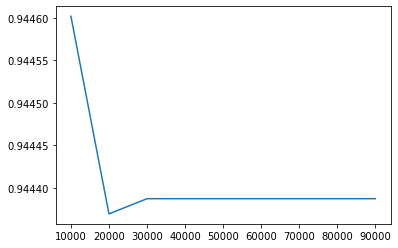

In [1554]:
plt.plot(range(10000,100000,10000),scores[0])

In [1199]:
taille=[15000,20000,25000,300000,350000,40000]
print(t)

[[1.4421639442443848, 1.5917737483978271, 1.865607738494873, 9.862903356552124, 3.1107778549194336, 2.936864137649536], [128.02226877212524, 123.6993191242218, 117.96371245384216, 120.63052415847778, 125.87328171730042, 117.07061386108398], [0.015551090240478516, 0.04352521896362305, 0.01884293556213379, 0.01790761947631836, 0.016187191009521484, 0.015477895736694336]]


In [1205]:
plt.plot(taille, np.array(a[0]),'r',taille,np.array(a[1]),'y', taille, np.array(a[2]), 'g')
plt.legend(['log_regression', 'SVC','Naive bais'])


### 2)Variation Max-df:

In [1587]:
scoresMaxRegLog=[]
time=[]
accuracy=[]
models = {
                "log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                #"multinomial Bais" : MultinomialNB()
            }
for i in np.arange(0.5,1,0.05) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(max_df=i)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["log regression"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresMaxRegLog.append(f1_score(models["log regression"].predict(X_test), y_test))

In [1589]:
scoresMaxMB=[]
time=[]
accuracy=[]
models = {
                #"log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                "multinomial Bais" : MultinomialNB()
            }
for i in np.arange(0.5,1,0.05) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(max_df=i)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["multinomial Bais"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresMaxMB.append(f1_score(models["multinomial Bais"].predict(X_test), y_test))

In [1595]:
plt.plot(np.arange(0.5,1,0.05),scoresMaxRegLog)
plt.gca().legend(('RegLog',))

In [1593]:
plt.plot(np.arange(0.5,1,0.05),scoresMaxMB)
plt.gca().legend(('MB',))

### 3)Variation Min-df:

In [1578]:
scores=[]
time=[]
accuracy=[]
models = {
                "log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                #"multinomial Bais" : MultinomialNB()
            }
for i in np.arange(0,0.2,0.025) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(min_df=i)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["log regression"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scores.append(f1_score(models["log regression"].predict(X_test), y_test))

In [1581]:
scoresBias=[]
time=[]
accuracy=[]
models = {
                #"log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                "multinomial Bais" : MultinomialNB()
            }
for i in np.arange(0,0.2,0.025) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(min_df=i)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["multinomial Bais"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresBias.append(f1_score(models["multinomial Bais"].predict(X_test), y_test))

In [ ]:
scoresSVM=[]
time=[]
accuracy=[]
models = {
                #"log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                "multinomial Bais" : MultinomialNB()
            }
for i in np.arange(0,0.2,0.025) :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(min_df=i)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["svm SVC"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresSVM.append(f1_score(models["svm SVC"].predict(X_test), y_test))

In [1598]:
#print(scores)

plt.plot(li,scores,li,scoresBias)
plt.gca().legend(('RegLog','NaiveBayes'))

In [1599]:
scoresNgramsNB=[]
accuracy=[]
models = {
                #"log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                "multinomial Bais" : MultinomialNB()
            }
grammes=[(1,1),(1,2),(2,2),(3,3),(1,3)]
for g in grammes :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(ngram_range=g)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["multinomial Bais"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresNgramsNB.append(f1_score(models["multinomial Bais"].predict(X_test), y_test))

In [1600]:
scoresNgramsreg=[]
accuracy=[]
models = {
                "log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                #"svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                #"multinomial Bais" : MultinomialNB()
            }
grammes=[(1,1),(1,2),(2,2),(3,3),(1,3)]
for g in grammes :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(ngram_range=g)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["log regression"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresNgramsreg.append(f1_score(models["log regression"].predict(X_test), y_test))

In [1602]:
print(scoresNgramsreg)
print(scoresNgramsNB)

[0.9443871632942389, 0.9487542651129851, 0.942988037668618, 0.934343592473152, 0.9477705370614105]
[0.9350829184662557, 0.9350775193798448, 0.9268598173967502, 0.8042458272440581, 0.9362031688663719]


In [1604]:
scoresNgramsSVM=[]
accuracy=[]
models = {
                #"log regression" : lin.LogisticRegression(C= 0.5,penalty="l2",max_iter = 10000),
                "svm SVC" : svm.SVC(kernel = 'linear' ,max_iter = 10000, C = 0.1),
                #"multinomial Bais" : MultinomialNB()
            }
grammes=[(1,1),(1,2),(2,2),(3,3),(1,3)]
for g in grammes :
            #X = pr.vect2(corpus, maxfeat=i)
            vectorizer = CountVectorizer(ngram_range=g)
            X = vectorizer.fit_transform(alltxts)
            X_tr, X_test, y_tr, y_test = train_test_split(X,alllabs,test_size = 0.3, random_state = 0)
            #start = time.time()
            models["svm SVC"].fit(X_tr, y_tr)
            #end = time.time() - start 

            #time.append(end)
            scoresNgramsSVM.append(f1_score(models["svm SVC"].predict(X_test), y_test))

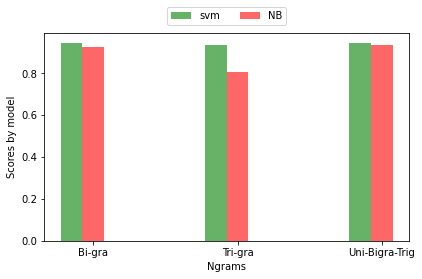

In [1625]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 3
#men_means = (22, 30, 33, 30, 26)
#women_means = (25, 32, 30, 35, 29)
svm_scores=scoresNgramsSVM
mb_scores=scoresNgramsNB
rl_scores=scoresNgramsreg
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.6

rects1 = plt.bar(index,svm_scores[2::], bar_width,
alpha=opacity,
color='g',
label='svm')

rects2 = plt.bar(index + bar_width, mb_scores[2::], bar_width,
alpha=opacity,
color='r',
label='NB')

#rects3 = plt.bar(index + bar_width, rl_scores, bar_width,
#alpha=opacity,
#color='y',
#label='RegLog')

plt.xlabel('Ngrams')
plt.ylabel('Scores by model')
plt.xticks(index + bar_width, ( 'Bi-gra', 'Tri-gra', 'Uni-Bigra-Trig'))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()
plt.show()

## Géneration du Y prédit avec notre meilleur modèle : 

In [1373]:
#best_modele=lin.LogisticRegression(penalty="l2",C=2)
best_modele=svm.LinearSVC(C=0.09)
best_modele.fit(X_train2,y_train2)

LinearSVC(C=0.09)

In [1539]:
tran_test2=pr.tranform(alltxts_t)
corpus2_test=tran_test2.text_trans(4)
vectorizer2 = CountVectorizer(vocabulary=tran2.vocabulary)
XTest=vectorizer2.transform(corpus2_test)

In [1541]:
y_pred=pr.write_predictions(XTest,best_modele,"./pred21H.txt")

## Lissage de la prédiction ( vu les labels sont sous forme de blocs)

In [1545]:

def lissage_prediction(prediction):
    
    #un label de classe positive entre 2 lables de classe négative --> classe négative
    for i in range(1,len(prediction)-1):
        if prediction[i]!=prediction[i-1] and prediction[i]!=prediction[i+1]:
            if (prediction[i] == -1):
                prediction[i] = 1
            else:
                #print("on est la")
                prediction[i]=-1
                
    #technique de K plus proche voisins 
                
    for i in range(5,len(prediction)-5):
        o=prediction[i-5:i]
        #print("o",o)
        p=prediction[i+1:i+6]
        #print("p",p)
        tmp=np.concatenate((o,p))
        #print("tmp",tmp)
        nb_M=np.count_nonzero((tmp == -1))
        #print("nb_M",nb_M)
        nb_C=np.count_nonzero((tmp == 1))
        #print(nb_C)
        if nb_M >=6 :
            #print("yesssssss")
            prediction[i]=-1
        if nb_C >=6:
            prediction[i]=1
    

    return prediction

In [1546]:
y_predli=lissage_prediction(y_pred)

In [1547]:
nb_M=np.count_nonzero(y_predli == -1)
nb_C=np.count_nonzero(y_predli == 1)
print(nb_M)
print(nb_C)

7682
19480


In [1551]:
def write_predictions(Y, fname):
    """predicts the vectorized data using model, writes the predictions on each line of file and returns prediction"""
    #pred  = model.predict(X)
    f = open(fname, "w")
    f.write('\n'.join(map(str, Y)))
    f.close()
    return 
h=write_predictions(y_predli,"./president3.txt")

## Visualisation des données 

### 1) Les 100 mots les plus fréquents 

## Words cloud des mots 

In [1630]:
sum_words = X1.sum(axis = 0) 
vec = CountVectorizer().fit(tran1.text)

#max_features=1500
#words_freq  = { word : sumwords[0, idx] for word, idx in  vec.vocabulary_()}
words_freq = { word : sum_words[0, idx] for word, idx in  vec.vocabulary_.items()}
words_freq1 = sorted(words_freq.items(), key=lambda x:x[1], reverse=True)
most_frequent = words_freq1[:100] # les 100 mots les plus fréquents
less_frequent = words_freq1[-200:] # les 100 mots les moins fréquents 

#voc1 on eneleve les mots tres fréquents et moins fréquents 
voc1 = pr.generate_vocabulary (corpus1, 2500, most_frequent + less_frequent)

v1  = TfidfVectorizer(vocabulary = voc1)
mat = v1.fit_transform(corpus1)

## Words Cloud des mots trés fréquent

In [1632]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=200,normalize_plurals=False).generate_from_frequencies(words_freq)
plt.imshow(wc)

## Words Cloud des mots trés peu fréquent 

In [22]:
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=150).generate_from_frequencies(OrderedDict(OrderedDict(less_frequent)))
plt.imshow(wc)

## Enlever les mots trés fréquents et moins fréquents  

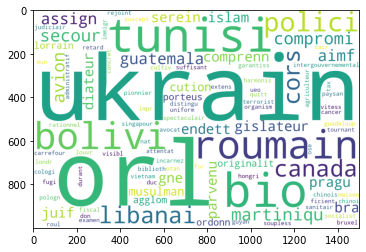

In [24]:
# le vocabulaire apres avoir enlevé les mots trés fréqeunts et les mots mois fréquents 
wc = WordCloud(background_color="white", width=1500,height=1000,max_words=100,normalize_plurals=False).generate_from_frequencies(voc1)
plt.imshow(wc)

## Les  mots les plus fréquents pour chaque documents :

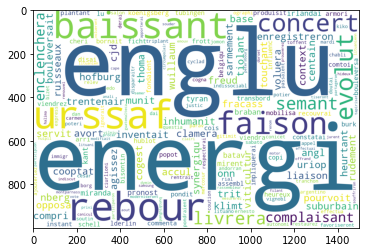

In [26]:
#pr chaque mot l'indice du mot qui me donne le maximum 

max_words=X.argmax(axis=0) 
#print(max_words)
words_freq_doc = { word : max_words[0, idx] for word, idx in  vec.vocabulary_.items()}
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=200,normalize_plurals=False).generate_from_frequencies(words_freq_doc)
plt.imshow(wc)
words_freq_doc=sorted(words_freq, key = lambda x: x[1], reverse=True)
voc1=pr.generate_vocabulary (preproc_doc,2500, most_frequent+less_frequent)


## Data Visualisation pour movies 

In [149]:
#preproc_doc_moov=pr.process(alltxts,[pr.remove_stopwords1,pr.stemming])
import numpy as np
y=np.array(alllabs)
ind0=np.where(y==0)
ind1=np.where(y==1)
i=X[ind0[0]]
c=i.sum(axis=0)
words_freq2 = { word : c[0, idx] for word, idx in  vec.vocabulary_.items()}
words_freq1=sorted(words_freq.items(),key=lambda x:x[1],reverse=True)
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=200,normalize_plurals=False).generate_from_frequencies(words_freq2)
plt.imshow(wc)

In [150]:
c=X[ind0[0]]
t=c.sum(axis=0).max()
print(t)
c=X[ind1[0]]
t=c.sum(axis=0).max()
print(t)

5006
6195


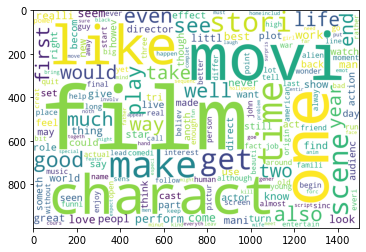

In [137]:
c=X[ind1[0]].sum(axis=0)
words_freq3 = { word : c[0, idx] for word, idx in  vec.vocabulary_.items()}
words_freq1=sorted(words_freq.items(),key=lambda x:x[1],reverse=True)
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=200,normalize_plurals=False).generate_from_frequencies(words_freq3)
plt.imshow(wc)

In [119]:
sum_words =X.sum(axis=0) 
vec = CountVectorizer().fit(preproc_doc_moov)
#max_features=1500
words_freq = { word : sum_words[0, idx] for word, idx in  vec.vocabulary_.items()}
words_freq1=sorted(words_freq.items(),key=lambda x:x[1],reverse=True)
most_frequent=words_freq1[:300] # les 100 mots les plus fréquents
less_frequent=words_freq1[-200:] # les 100 mots les moins fréquents 
voc1=pr.generate_vocabulary (preproc_doc_moov,2500, most_frequent+less_frequent)



In [117]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=200,normalize_plurals=False).generate_from_frequencies(words_freq)
plt.imshow(wc)

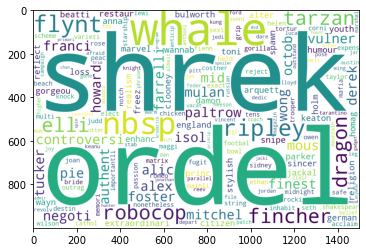

In [120]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(background_color="white",width=1500,height=1000, max_words=200,normalize_plurals=False).generate_from_frequencies(voc1)
plt.imshow(wc)